# Игровая индустрия

# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Изучение данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/datasets/games.csv')

In [4]:
display(df.head())
display(df.info())
display(df.isna().sum())
df.duplicated().sum()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

0

**Вывод:**

+ Необходимо привести к правильному типу столбец `Year_of_Release`;
+ Нужно привести к нижнему регистру столбцы нашей таблицы, а так же данные в них;
+ Имеются пустые значения в столбцах: `Rating`, `User_Score`, `Critic_Score`.  
  Мы можем заменить имеющиеся пустые значения в столбце `Year_of_Release`;
+ Дубликатов нет.

**Дополнительная информация:**

`Critic_Score` и `User_Score`  
Крупнейшие платформы, освещающие рынок игр, стали появляться во второй половине 90-х (IGN - 1996, Igromania - 1997, Metacritic - 1998). Таким образом, вполне вероятно, что далеко не всем играм, выпущенным до 1996 года, критики ставили оценки. То же самое справедливо и для столбца `User_Score`. Ведь оценки играм пользователям нужно было где-то размещать в сети. Также, так как данные не за полный 2016 год, то и там логично наблюдать пустые значения.

`Raiting`  
Крупнейшая негосударственная организация (ESRB), присуждающая рейтинги играм была основана в 1994 году. Соответственно, далеко не всем играм, выпущенным до этого года, присуждался рейтинг.

## Предобработка данных

**Выполним следующие действия:**

+ Приведем к нижнему регистру названия столбцов и данные в них
+ Изменим тип данных
+ Заполним пропуски в столбце `Rating`
+ Разберемся с значениями `'tbd'` в `User_Score`
+ Добавим дополнительный столбец с суммарными продажами по всем регионам

In [5]:
# приведем к нижнему регистру названия столбцов
df.columns = df.columns.str.lower()

In [6]:
# приведем к нижнему регистру данные в столбцах
for column in df[['name','platform','genre','rating']]:
    df[column] = df[column].str.lower()

In [7]:
# изменим тип данных в столбце year_of_realese
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [8]:
# цикл заполняющий пропуски в годах, для тех игр, дата релиза которых известна на других платформах
for i in df[df['year_of_release'].isnull() == True].index:  
    df['year_of_release'][i] = df.loc[df['name'] == df['name'][i], 'year_of_release'].max()

In [9]:
# аббревиатура tbd (to be determined - будет определено), то же что NaN (неизвестное значение)
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)

In [10]:
# изменим тип данных в столбце user_score
df['user_score'] = df['user_score'].astype(float)

In [11]:
# добавим столбец с суммарными продажами по всем регионам
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,e,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,e,28.91
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,e,28.32
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16569 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
total_sales        16715 non-null float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


**Вывод:**

Мы заменили пропущенные значения в столбце `year_of_release`. Что касается остальных пропусков, для их заполнения у нас недостаточно данных. Поэтому, лучше будем работать с меньшим количеством данных но хорошего качества. В остальном же, ошибки в данных устранены. Данные подготовлены к дальнейшему анализу.

## Анализ данных

**Выполним следующие действия:**

+ Посмотрим сколько игр выпускалось в разные годы
+ Выясним как менялись продажи по платформам
+ Возьмем данные за актуальный период и сделаем прогноз на 2017 год
+ Выберем несколько прибыльных платформ
+ Узнаем как влияют оценки пользователей и критиков на игровую индустрию

**Посмотрим:**
+ Сколько игр выпускалось в разные годы.

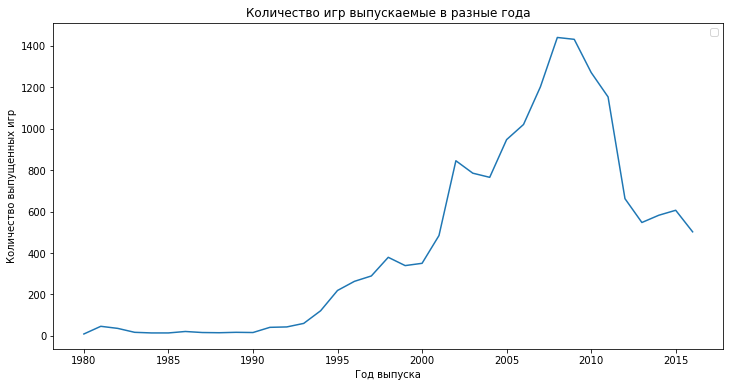

In [13]:
games_on_period = df.pivot_table(index='year_of_release',
                                 values='name',
                                 aggfunc='count')

plt.figure(figsize=(12,6))
sns.lineplot(data=games_on_period)

plt.title("Количество игр выпускаемые в разные года")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('')
plt.show()

**Вывод:**

+ Из графика видно, что количество игр для консолей и компьютеров начало расти с большой скоростью с 90-х годов до 2008 года; 
+ С 2008 года, после того как массово начали создавать мобильные приложения и игры, виден резкий спад консольных игр.

**Посмотрим:**
+ Как менялись продажи по платформам.  
  Выберем платформы с наибольшими суммарными продажами и построим распределение по годам;
+ Возьмем данные за соответствующий актуальный период. Эти данные помогут построить прогноз на 2017 год;
+ Выберем несколько потенциально прибыльных платформ.

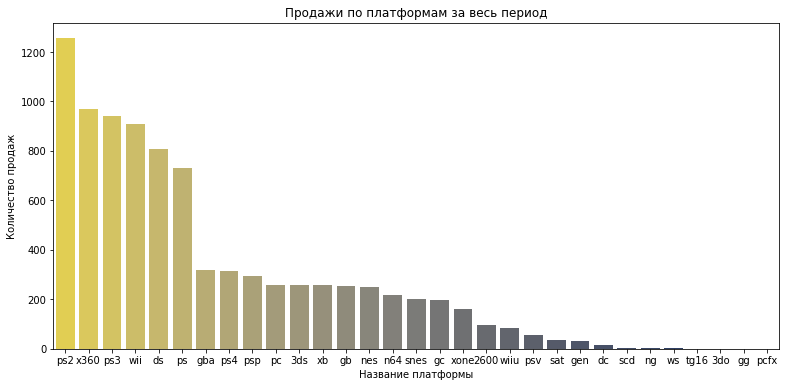

In [14]:
platform_on_sales = df.pivot_table(index='platform',
                                   values='total_sales',
                                   aggfunc='sum').sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(13,6))
sns.barplot(x=platform_on_sales.index,
            y=platform_on_sales['total_sales'],
            palette='cividis_r')

plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
plt.show()

Из графика видно, что самые популярные игровые платформы за весь период это:
+ `PS2`;
+ `X360`;
+ `PS3`;
+ `WII`;
+ `DS`;
+ `PS`.

In [15]:
platform_grouped = platform_on_sales.reset_index()
platforms_list = platform_grouped['platform'].unique()
platforms_list

array(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'gba', 'ps4', 'psp', 'pc',
       '3ds', 'xb', 'gb', 'nes', 'n64', 'snes', 'gc', 'xone', '2600',
       'wiiu', 'psv', 'sat', 'gen', 'dc', 'scd', 'ng', 'ws', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

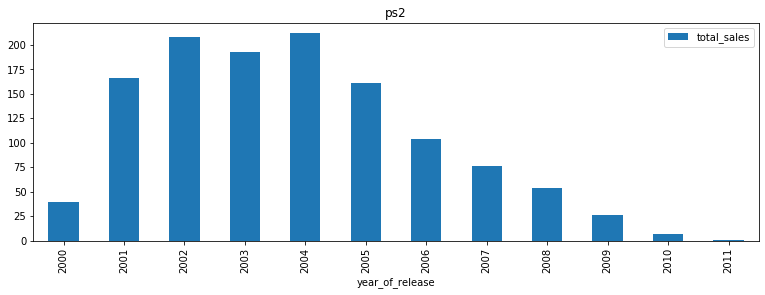

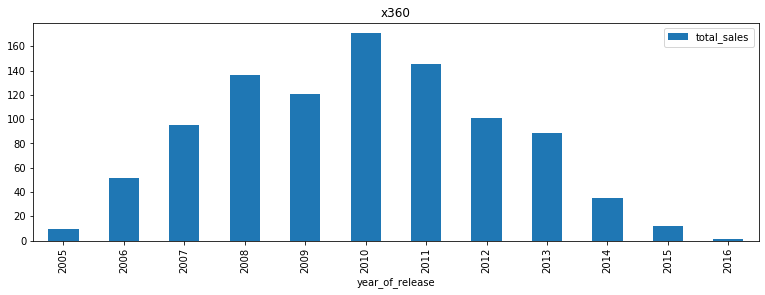

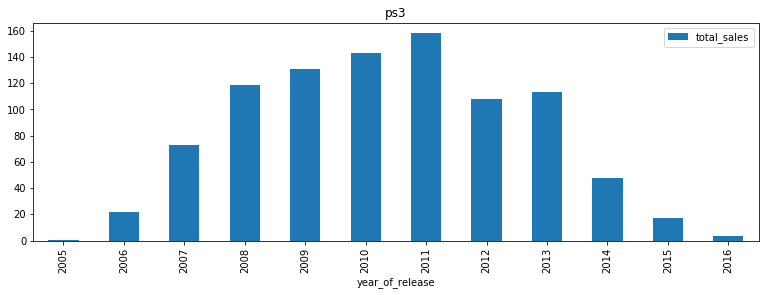

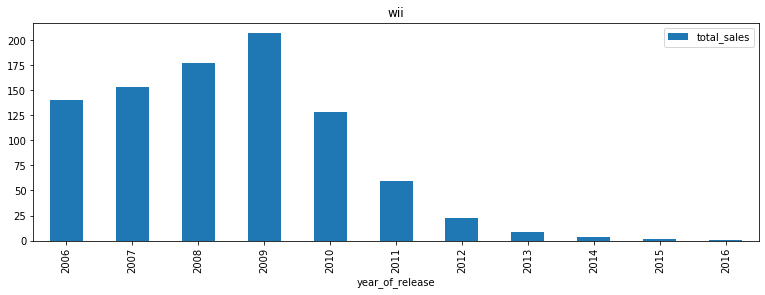

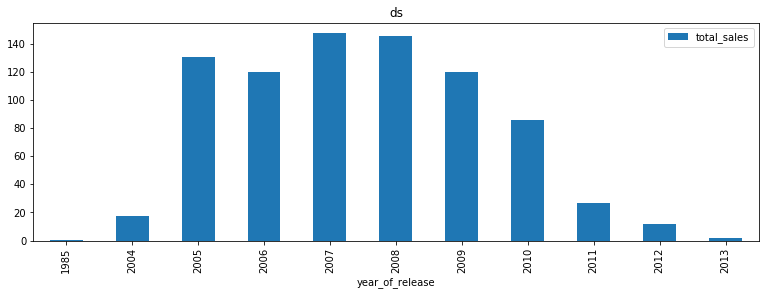

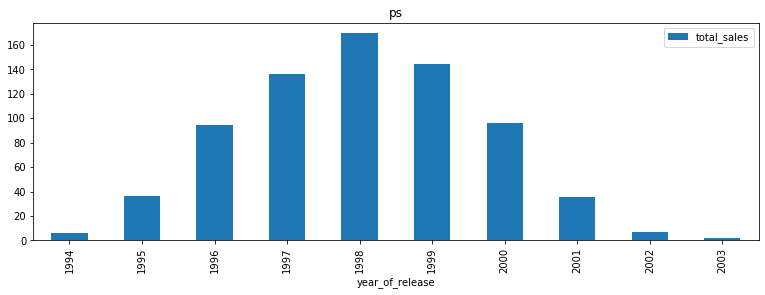

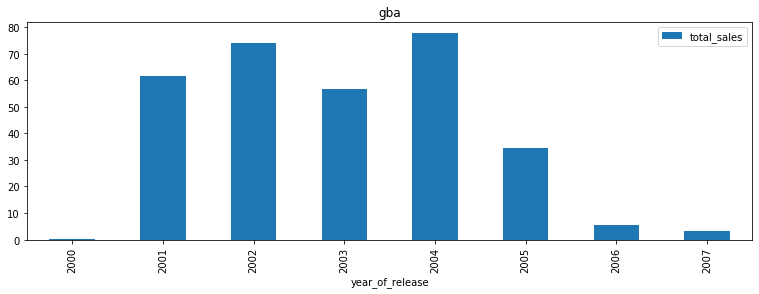

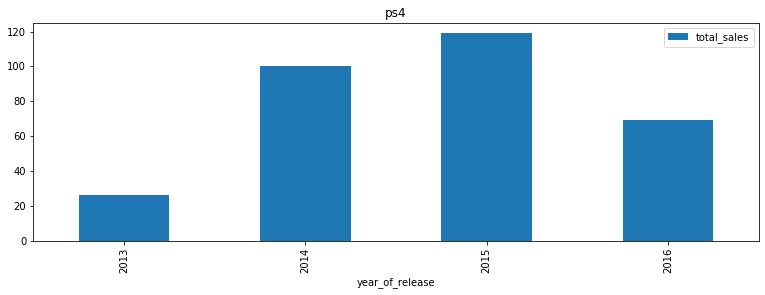

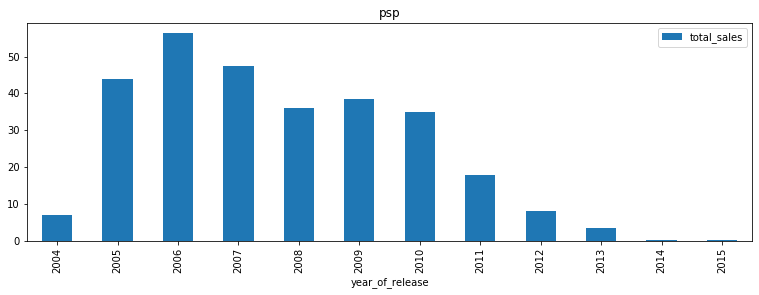

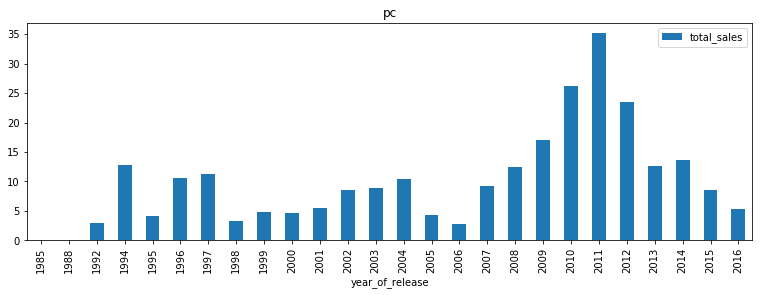

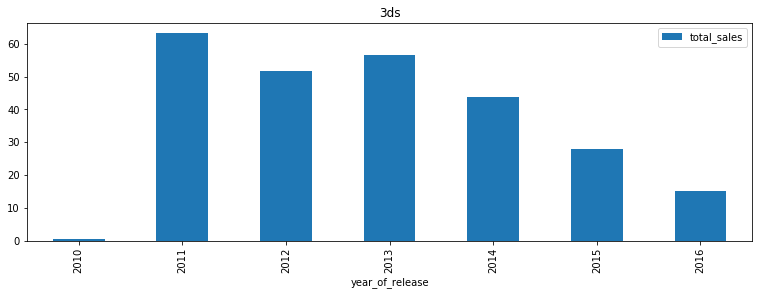

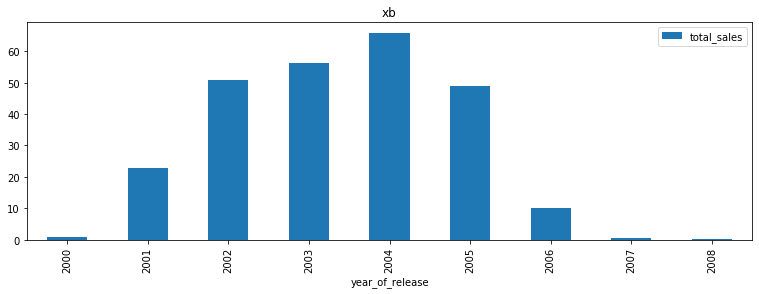

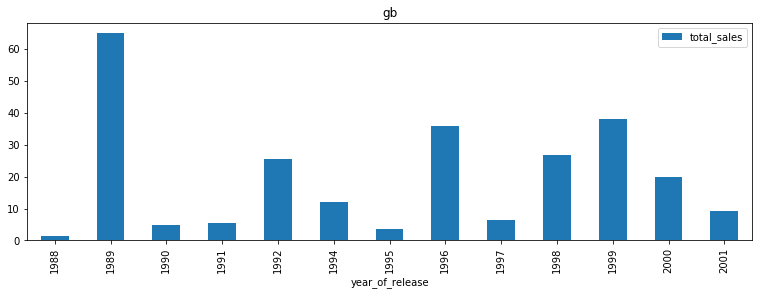

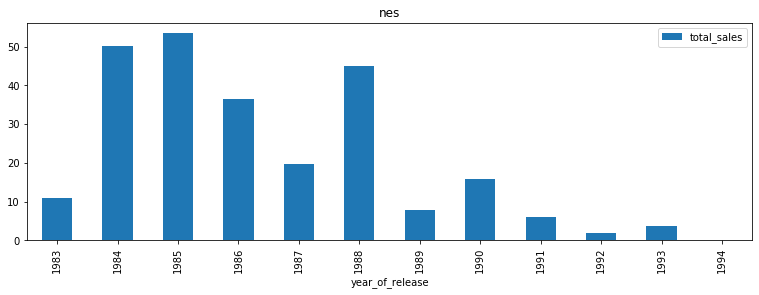

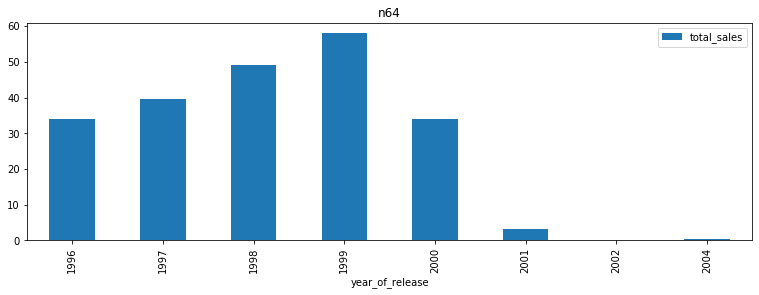

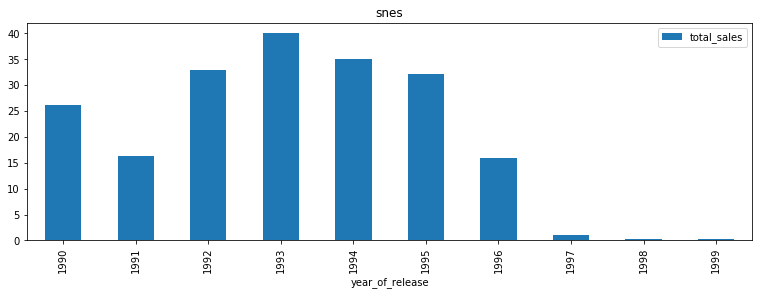

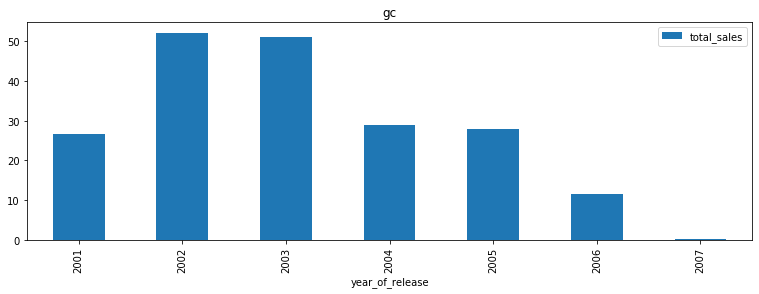

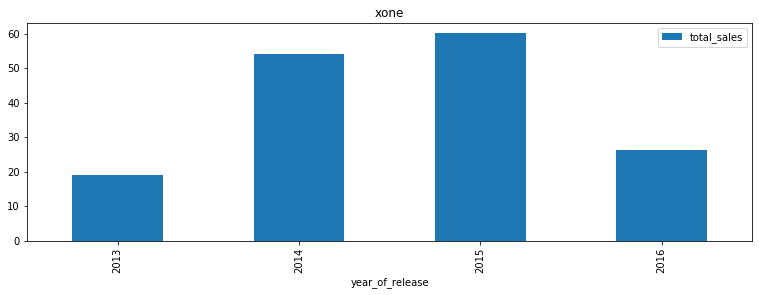

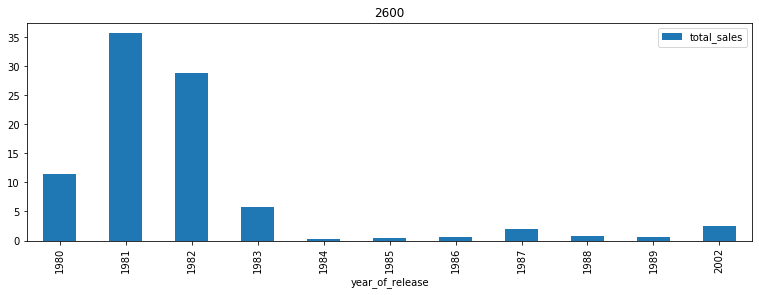

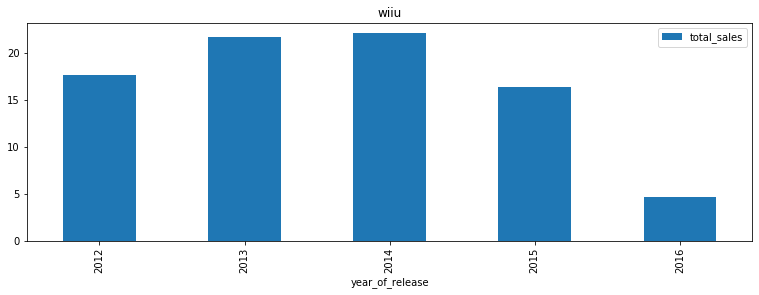

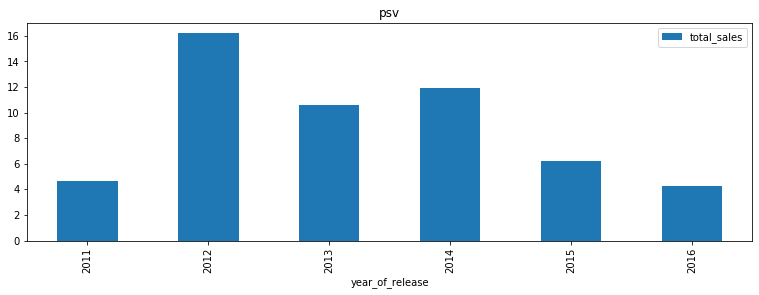

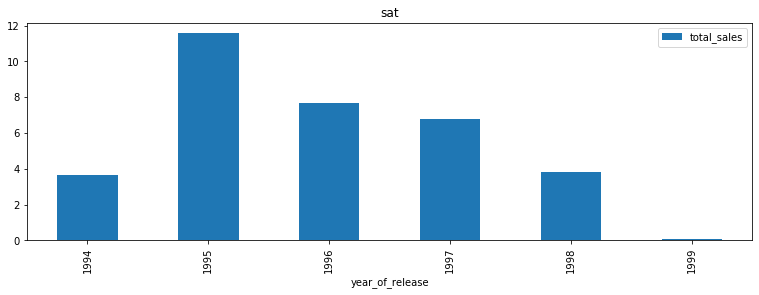

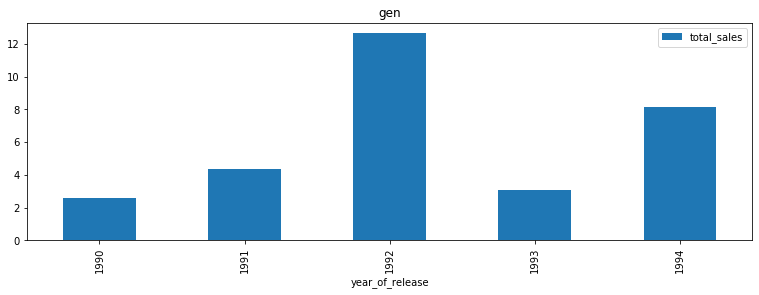

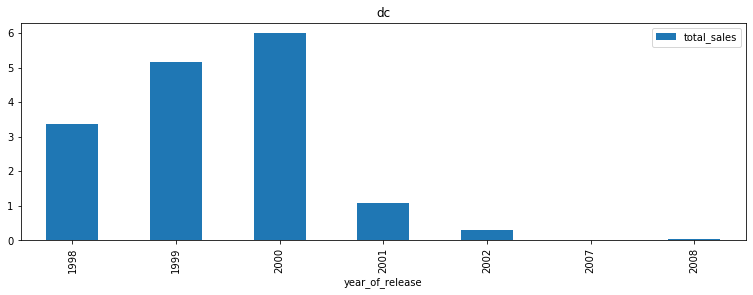

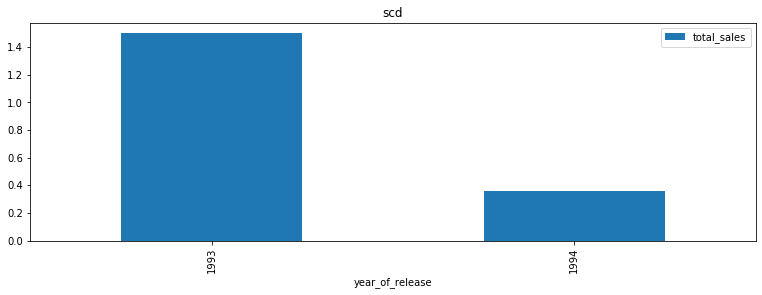

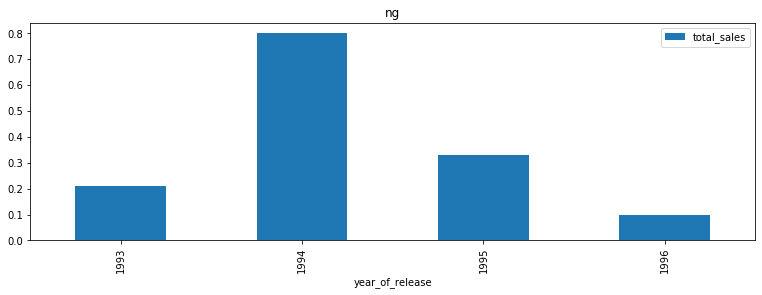

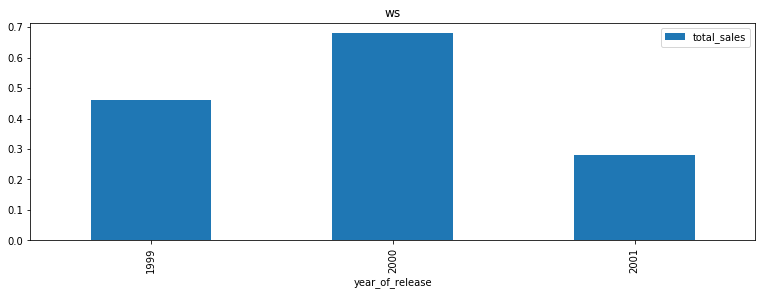

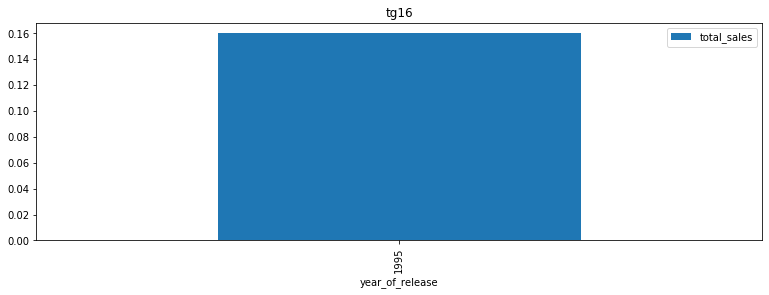

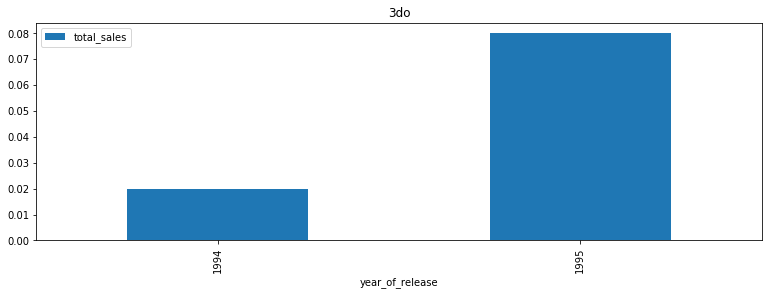

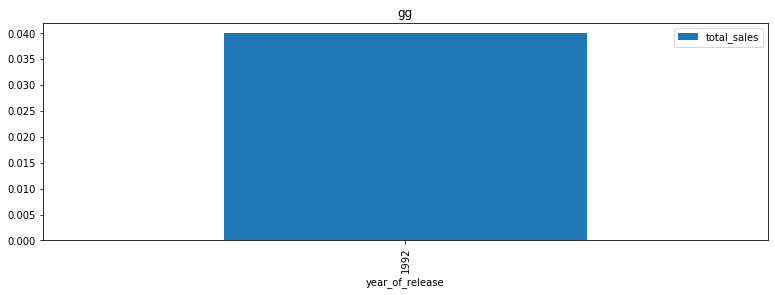

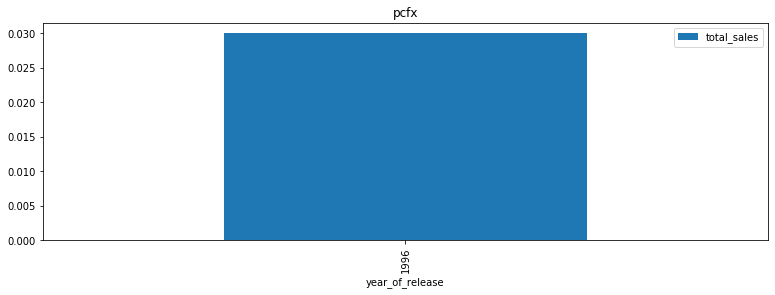

In [16]:
# построим распределения по годам для каждой платформы.
for platform in platforms_list:
    df[df['platform'] == platform].pivot_table(index='year_of_release',
                                                     values='total_sales',
                                                     aggfunc='sum') \
                                  .plot(kind='bar',
                                        figsize=(13,4))
    plt.title(platform)

In [17]:
# создадим свою таблицу по платформам и их обшим продажам, отсортируем их по убыванию и оставим только топ-5
top_5_platforms = df.pivot_table(index='platform',
                                 values='total_sales',
                                 aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)
top_5_platforms = top_5_platforms.reset_index().rename_axis(None, axis=1)

# топ-5 продаваемых платформ
top_5_platforms

,platform,total_sales
0,ps2,1255.77
1,x360,971.42
2,ps3,939.65
3,wii,907.51
4,ds,806.12


**Вывод:**

- Практически все игровые платформы в среднем существуют по 10 лет; 
- Cамые продаваемые это `Sony PlayStation` и `XBOX`;
- Самый пик наступает примерно через 5 лет после выхода приставки;
- у `Nintento WII` был быстрый скачок в 2009 году и такой же резкий провал;
- Пятерка лидирующих по продажам за всё время платформ в нашем датасете теряет свое могущество на момент 2016 года;
- Из тех, кто продолжает оставаться на плаву в 2016 году, можно отметить: `PS4`, `PC`, `Nintendo 3DS`, `XBOX One`, `Nintendo Wii U`, `PlayStation Vita`.

**Определим период, за который нужно взять данные для дальнейшего исследования:**

- Сейчас у нас выделяются 3 явных этапа развития индустрии: рост до 2008 года, пик 2008 и 2009 годов, а также сокращение рынка последних годов.
- Также большей части платформ уже нет в 2016 году, в построении прогноза на 2017 год они нам не помогут.
- При уменьшении периода в рассмотрение попадут только последние поколения платформ, а также будем рассматривать период не больше 3-х лет.

In [18]:
df = df[df['year_of_release'] > 2013].reset_index(drop=True)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
1,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
2,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
3,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,e,8.58
4,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


In [19]:
df.platform.value_counts()

ps4     376
psv     295
xone    228
ps3     219
3ds     212
pc      152
x360    111
wiiu     73
psp      13
wii      11
Name: platform, dtype: int64

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам:**

In [20]:
# сохраним в переменной df_top_5_platforms топ 5 платформ и избавимся от выбросов
list_of_top5 = ['ps4', 'xone', 'psv', 'pc', '3ds']
df_top_5_platforms = df[df['platform'].isin(['ps4', 'xone', 'psv', 'pc', '3ds'])]
df_top_5_platforms = df_top_5_platforms[df_top_5_platforms['total_sales'] < 1.4]

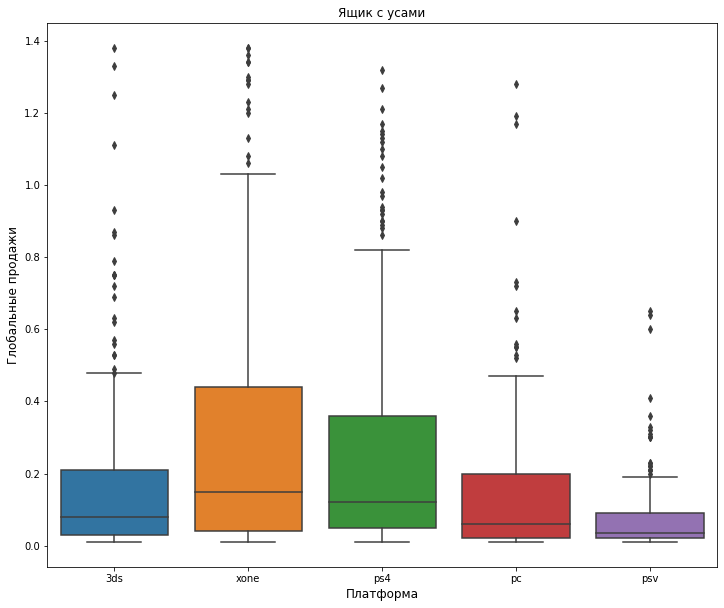

In [21]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df_top_5_platforms,
            x='platform',
            y='total_sales')

plt.title('Ящик с усами', fontsize=12)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

**Вывод:**

- Исходя из графиков видно, что медиана протекает у всех по разному
- Больше всех продаж у `XOne`, затем `PS4`, после `3DS`, `PC` и `PSV` на последнем месте.

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков:**
+ построем диаграмму рассеяния;
+ посчитаем корреляцию между отзывами и продажами. 

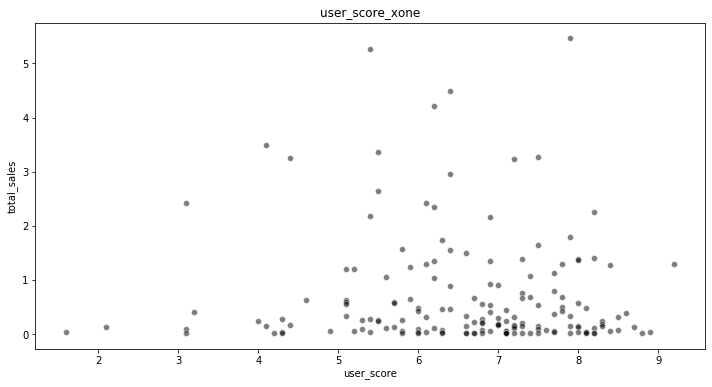

In [22]:
# диаграмма рассеяния по оценкам пользователей
xbox_one = df[df['platform']=='xone']

plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score',
                y='total_sales',
                alpha=0.5,
                color='black',
                data=xbox_one)

plt.title('user_score_xone')
plt.show()

In [23]:
# корреляция между оценками пользователей и продажами 
round(xbox_one['user_score'].corr(xbox_one['total_sales']), 2)

-0.07

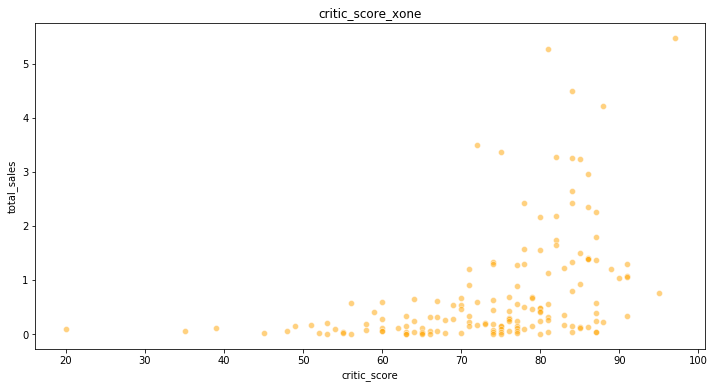

In [24]:
# диаграмма рассеяния по оценкам критиков 
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score',
                y='total_sales',
                alpha=0.5,
                color='orange',
                data=xbox_one)
plt.title('critic_score_xone')
plt.show()

In [25]:
# корреляция между оценкой критиков и продажам
round(xbox_one['critic_score'].corr(xbox_one['total_sales']), 2)

0.43

**Соотнесем выводы с продажами игр на других платформах:**

In [26]:
def other_platform_matrix(name_of_platform):
    platform = df[df['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', alpha=0.5, data=platform, color='black', ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', alpha=0.5, data=platform, color='orange', ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    correl = round(platform['user_score'].corr(platform['total_sales']), 2)
    critic_correl = round(platform['critic_score'].corr(platform['total_sales']), 2)
    
    if 0.3 >= correl >= 0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая', correl)
    if 0.5 >= correl >= 0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Умеренная', correl)
    if 0.7 >= correl >= 0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Высокая', correl)
    if 0.9 >= correl >= 0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Весьма высокая', correl)
    if 1 >= correl >= 0.9:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Сильная', correl)
    
    if 0.1 >= correl >= -0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Корреляция не выявлена', correl)
    if -0.1 >= correl >= -0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая обратная', correl)
    if -0.3 >= correl >= -0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Умеренная обратная', correl)
    if -0.5 >= correl >= -0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Высокая обратная', correl)
    if -0.7 >= correl >= -0.9:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Весьма высокая обратная', correl)
    if -0.9 >= correl >= -1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Сильная обратная', correl)
        
    if 0.3 >= critic_correl >= 0.1:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Слабая', critic_correl)
    if 0.5 >= critic_correl >= 0.3:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Умеренная', critic_correl)
    if 0.7 >= critic_correl >= 0.5:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Высокая', critic_correl)
    if 0.9 >= critic_correl >= 0.7:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Весьма высокая', critic_correl)
    if 1 >= critic_correl >= 0.9:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Сильная', critic_correl)
    
    if 0.1 >= critic_correl >= -0.1:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Корреляция не выявлена', critic_correl)
    if -0.1 >= critic_correl >= -0.3:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Слабая обратная', critic_correl)
    if -0.3 >= critic_correl >= -0.5:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Умеренная обратная', critic_correl)
    if -0.5 >= critic_correl >= -0.7:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Высокая обратная', critic_correl)
    if -0.7 >= critic_correl >= -0.9:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Весьма высокая обратная', critic_correl)
    if -0.9 >= critic_correl >= -1:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Сильная обратная', critic_correl)

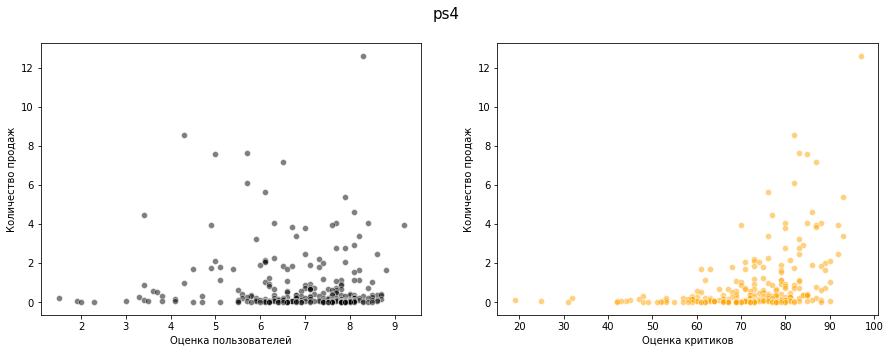

Корреляция между отзывами пользователей и продажами  PS4 : Корреляция не выявлена -0.04
Корреляция между отзывами критиков и игровой платформой  PS4 : Умеренная 0.4


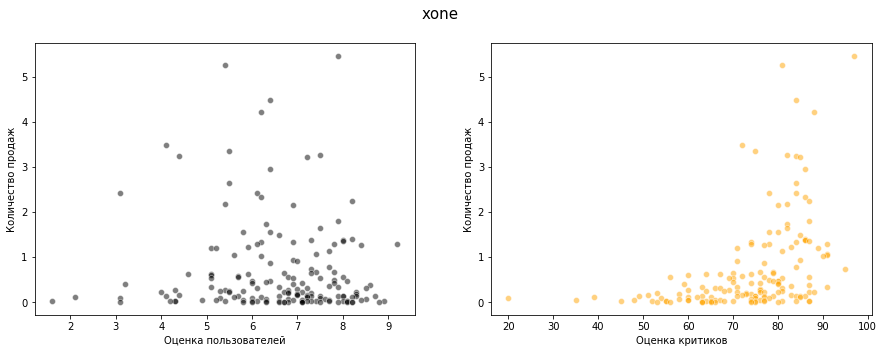

Корреляция между отзывами пользователей и продажами  XONE : Корреляция не выявлена -0.07
Корреляция между отзывами критиков и игровой платформой  XONE : Умеренная 0.43


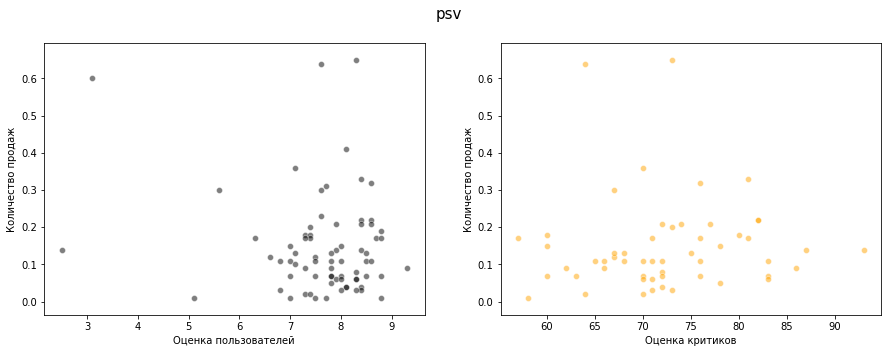

Корреляция между отзывами пользователей и продажами  PSV : Слабая обратная -0.17
Корреляция между отзывами критиков и игровой платформой  PSV : Корреляция не выявлена 0.04


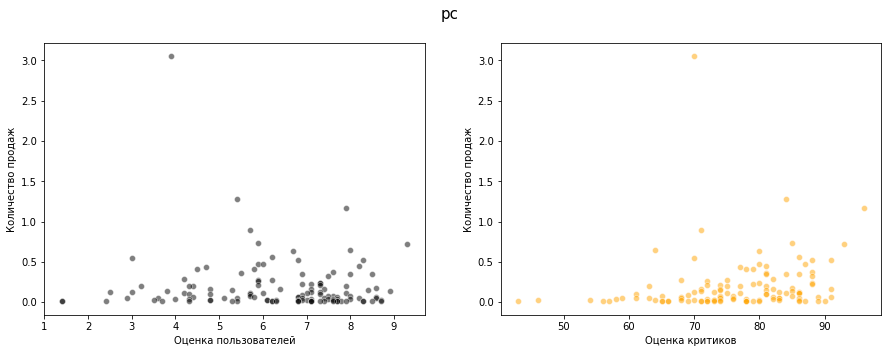

Корреляция между отзывами пользователей и продажами  PC : Корреляция не выявлена -0.07
Корреляция между отзывами критиков и игровой платформой  PC : Слабая 0.18


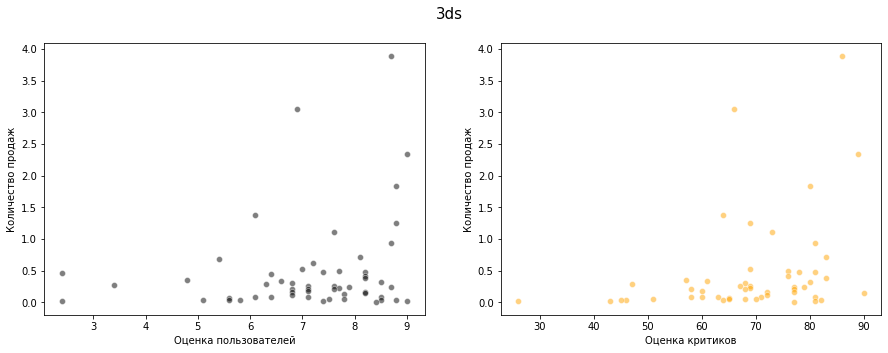

Корреляция между отзывами пользователей и продажами  3DS : Слабая 0.22
Корреляция между отзывами критиков и игровой платформой  3DS : Умеренная 0.31


In [27]:
for platform in list_of_top5:
    other_platform_matrix(platform)

In [28]:
# дисперсия, стандартное отклонение, среднее и медиана у топ-5 платформ по оценкам пользователей
for platform in list_of_top5:
    print('Дисперсия', platform.upper(),':', np.var(df[df['platform']==platform]['user_score']))
    print('Стандартное отклонение', platform.upper(),':', np.std(df[df['platform']==platform]['user_score']))
    print('Среднее',platform.upper(),':',  df[df['platform']==platform]['user_score'].mean())
    print('Медиана',platform.upper(),':',  df[df['platform']==platform]['user_score'].median())
    print('\n')

Дисперсия PS4 : 1.949210436445598
Стандартное отклонение PS4 : 1.3961412666509065
Среднее PS4 : 6.82809917355372
Медиана PS4 : 7.1


Дисперсия XONE : 1.879546005509642
Стандартное отклонение XONE : 1.3709653553280046
Среднее XONE : 6.594545454545454
Медиана XONE : 6.8


Дисперсия PSV : 1.2008181647588672
Стандартное отклонение PSV : 1.0958184907907271
Среднее PSV : 7.656164383561643
Медиана PSV : 7.8


Дисперсия PC : 2.8930689404455023
Стандартное отклонение PC : 1.7009023900405051
Среднее PC : 6.316260162601626
Медиана PC : 6.8


Дисперсия 3DS : 2.2194512396694215
Стандартное отклонение 3DS : 1.4897822792842657
Среднее 3DS : 7.138181818181819
Медиана 3DS : 7.4




In [29]:
# дисперсия, стандартное отклонение, среднее и медиана у топ-5 платформ по оценкам критиков
for platform in list_of_top5:
    print('Дисперсия', platform.upper(),':', np.var(df[df['platform']==platform]['critic_score']))
    print('Стандартное отклонение', platform.upper(),':', np.std(df[df['platform']==platform]['critic_score']))
    print('Среднее',platform.upper(),':',  df[df['platform']==platform]['critic_score'].mean())
    print('Медиана',platform.upper(),':',  df[df['platform']==platform]['critic_score'].median())
    print('\n')

Дисперсия PS4 : 148.57629653367516
Стандартное отклонение PS4 : 12.189187689656565
Среднее PS4 : 72.16455696202532
Медиана PS4 : 73.0


Дисперсия XONE : 149.15737773152964
Стандартное отклонение XONE : 12.21300035746866
Среднее XONE : 73.79354838709678
Медиана XONE : 76.0


Дисперсия PSV : 59.96982167352537
Стандартное отклонение PSV : 7.744018444807926
Среднее PSV : 72.25925925925925
Медиана PSV : 72.0


Дисперсия PC : 94.61991379940098
Стандартное отклонение PC : 9.727276792576685
Среднее PC : 76.2991452991453
Медиана PC : 77.0


Дисперсия 3DS : 162.09765474817377
Стандартное отклонение 3DS : 12.731757724217571
Среднее 3DS : 68.98039215686275
Медиана 3DS : 69.0




**Вывод:**

+ Практически у всех платформ присутствуем корреляция, между оценками пользователей и критиков к продажам;
+ Оценка пользователей слабо влияет на продажи, чего не скажешь о оценке критиков. Покупатели прислушиваются больше к критикам чем к оценкам других пользователей.

**Посмотрим на общее распределение игр по жанрам:**

In [30]:
# выберем жанры и их продажи с сортировкой по убыванию
distr_genre = df.pivot_table(index='genre',
                             values='total_sales',
                             aggfunc='mean').sort_values(by='total_sales', ascending=False)
distr_genre = distr_genre.reset_index().rename_axis(None, axis=1)
distr_genre

,genre,total_sales
0,shooter,1.335469
1,sports,0.680000
2,platform,0.476053
3,fighting,0.470333
4,role-playing,0.459005
5,racing,0.398841
6,misc,0.332301
7,action,0.322113
8,simulation,0.298409
9,puzzle,0.157857


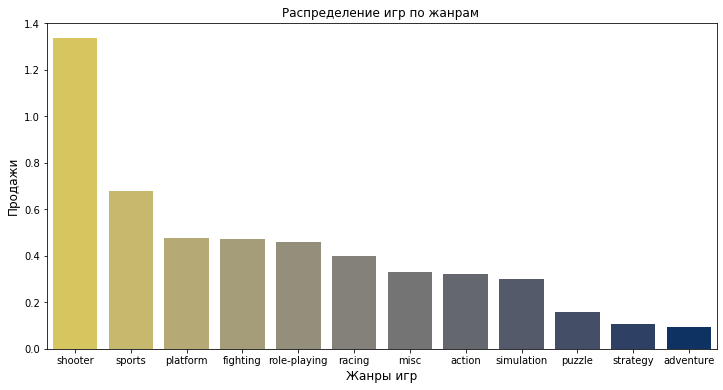

In [31]:
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=12)
sns.barplot(data=distr_genre,
            x='genre',
            y='total_sales',
            palette='cividis_r')

plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.show()

Лучше всего продаются игры жанра `Shooter`. На последнем месте закрепились `Adventure`.

**Вывод:**

+ Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90-х годов до 2008 года. С 2008 года, после того как массово начали создавать мобильные приложения и игры, произошел резкий спад разработки игр на игровые платформы.
+ Самые популярные игровые платформы за весь период : `Sony PlayStation 2`, `Xbox 360`, `Sony Playstation 3`, `Nintendo WII`, `Nintendo DS`, `Sony Playstation`.
+ Средняя жизнь игровой платформы составляет 10 лет. Пик продаж наступает примерно через 5 лет после выхода приставки.
+ Больше всего продаются игры на `Sony Playstation` и `Xbox 360`
+ У всех платформ наблюдается взаимосвязь между продажами и оценками критиков и пользователей. Заметнее всего корреляция между оценками критиков и продажами. Это значит для людей мнение критиков важнее мнения других пользователей
+ Самым популярным жанром за последние 3 года, стал `Shooter`

## Составим портрет пользователя каждого региона

**Определим для пользователя каждого региона (`NA`, `EU`, `JP`):**

+ Самые популярные платформы (топ-5);
+ Самые популярные жанры (топ-5);
+ Влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [32]:
# функция для создания сводбных таблиц за последние 3 года
def for_pivot(row, title):
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']), axes.flatten()[:3]):
        ppivot = df.pivot_table(index=pivot,
                                values=row,
                                aggfunc='sum') \
        .sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        
        print(ppivot)
        print('\n\n') 
        sns.set_palette('PuOr_r')
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=12)

**Портрет пользователя `North America`**

  platform  na_sales
0      ps4     98.61
1     xone     81.27
2     x360     28.30
3      3ds     22.64
4      ps3     22.05



          genre  na_sales
0       shooter     79.02
1        action     72.59
2        sports     46.13
3  role-playing     33.47
4          misc     15.05



  rating  na_sales
0      m     96.48
1      e     50.74
2      t     38.95
3   e10+     33.23





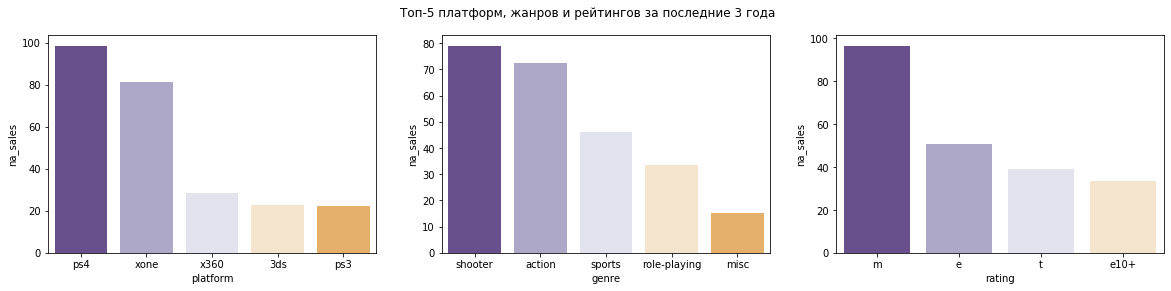

In [33]:
for_pivot('na_sales','Топ-5 платформ, жанров и рейтингов за последние 3 года')

**Вывод:**

+ Самые популярные игровые платформы в Северной Америке: `PS4`, `XOne`, `X360`, `3DS`, `PS3`;
+ Топ-5 жанров в Северной Америке: `Shooter`, `Action`, `Sports`, `Role-Plaing`, `Misc`;
+ По рейтингам видно, что больше всего продаж у игр с рейтингом `'от 17 и выше'`, на втором месте игры с рейтингом `'для всех'` и на третьем месте игры с рейтингом `'от 13 и выше'`.

**Портрет пользователя `European Union`**

  platform  eu_sales
0      ps4    130.04
1     xone     46.25
2      ps3     25.54
3       pc     18.22
4      3ds     16.12



          genre  eu_sales
0        action     74.93
1       shooter     65.52
2        sports     45.73
3  role-playing     28.17
4        racing     14.13



  rating  eu_sales
0      m     93.69
1      e     58.06
2      t     34.07
3   e10+     26.16





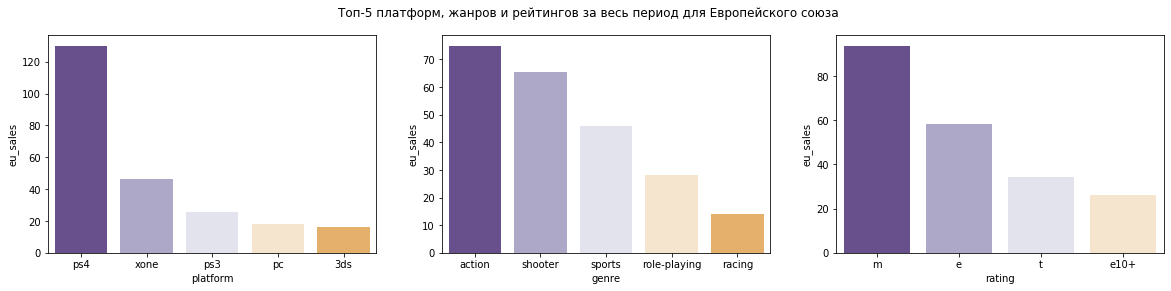

In [34]:
for_pivot('eu_sales','Топ-5 платформ, жанров и рейтингов за весь период для Европейского союза')

**Вывод:**

+ Самые популярные игровые платформы в Европе это: `PS4`, `XOne`, `PS3`, `PC`, `3DS`;
+ Топ-5 жанров в Европе: `Action`, `Shooter`, `Sports`, `Role-Plaing`, `Racing`;
+ По рейтингам видно, что больше всего продаж у игр с рейтингом `'от 17 и выше'`, на втором месте игры с рейтингом `'для всех'` и на третьем месте игры с рейтингом `'от 13 и выше'`.

**Портрет пользователя `Japanese`**

  platform  jp_sales
0      3ds     44.24
1      ps4     15.02
2      psv     14.54
3      ps3     11.22
4     wiiu      7.31



          genre  jp_sales
0  role-playing     31.16
1        action     29.58
2      fighting      6.37
3          misc      5.61
4       shooter      4.87



  rating  jp_sales
0      t     14.78
1      e      8.94
2      m      8.01
3   e10+      4.46





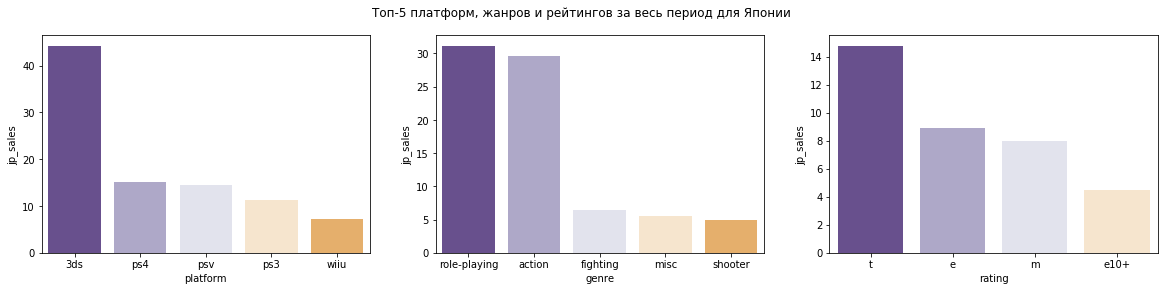

In [35]:
for_pivot('jp_sales','Топ-5 платформ, жанров и рейтингов за весь период для Японии')

**Вывод:**

+ Самые популярные игровые платформы в Японии это: `3DS`, `PS4`, `PSV`, `PS3`, `WIIU`;
+ Топ-5 жанров в Японии: `Role-Playing`, `Action`, `Fighting`, `Misc`, `Shooter`;
+ По рейтингам видно, что больше всего продаж у игр с рейтингом `'от 13 и выше'`, на втором месте игры с рейтингом `'для всех'` и на третьем месте игры с рейтингом `'от 17 и выше'`.

**Визуализируем суммарные продажи игр по жанрам, рейтингу и платформам:**

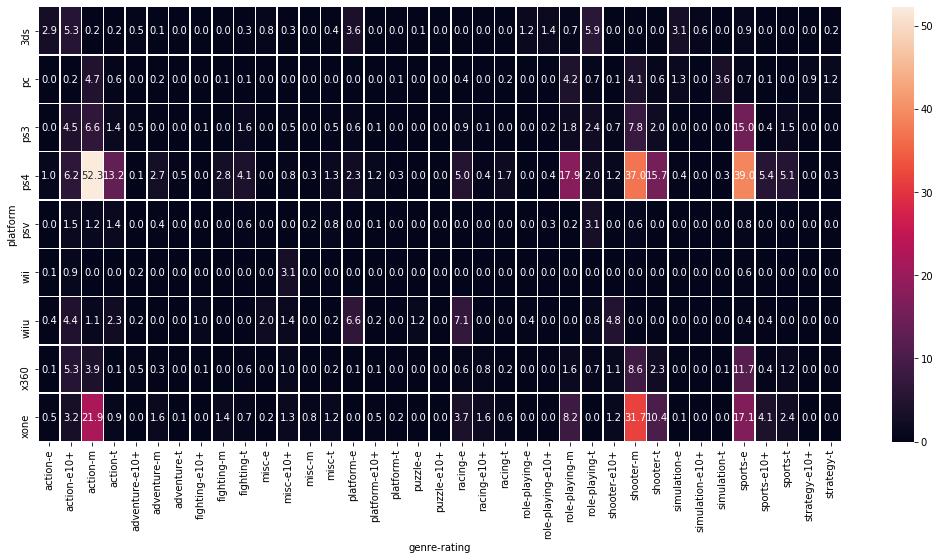

In [36]:
platform_genre_sales = df.pivot_table(index='platform',
                                      columns=['genre', 'rating'],
                                      values='total_sales',
                                      aggfunc='sum').fillna(0).applymap(float)
plt.figure(figsize=(18,8))
sns.heatmap(platform_genre_sales, annot=True, fmt='.1f', linewidths=.5)
plt.show()

В нашем датасете предостаточно игр без рейтинга. Посмотрим на их продажи по регионам за 2016 год.

**Продажи игр без рейтинга в Северной Америке:**

In [37]:
# продажи игр без рейтинга по платформам для Северной Америки
no_rate_na = df[pd.isnull(df['rating'])]
no_rate_na = no_rate_na[no_rate_na['year_of_release'] > 2015]
no_rate_na.pivot_table(index='platform',
                       values='na_sales',
                       aggfunc='sum') \
          .sort_values(by='na_sales',
                       ascending=False) \
          .reset_index() \
          .rename_axis(None, axis=1) \
          .head(60)

,platform,na_sales
0,3ds,3.38
1,ps4,3.12
2,xone,1.40
3,wiiu,0.35
4,ps3,0.19
5,pc,0.08
6,x360,0.01
7,psv,0.00


In [38]:
# продажи игр без рейтинга по жанрам для Северной Америки
no_rate_na[no_rate_na['na_sales'] > 0].pivot_table(index='genre',
                                                   values='na_sales',
                                                   aggfunc='sum') \
                                      .sort_values(by='na_sales',
                                                   ascending=False) \
                                      .reset_index() \
                                      .rename_axis(None, axis=1) \
                                      .head(60)

,genre,na_sales
0,role-playing,4.36
1,action,1.62
2,shooter,1.11
3,platform,0.55
4,adventure,0.35
5,misc,0.32
6,racing,0.11
7,sports,0.06
8,fighting,0.05


In [39]:
# количество игр без рейтинга в разрезе платформ, где продажи не равны нулю, в Северной Америке
no_rate_na[no_rate_na['na_sales'] > 0].pivot_table(index='platform',
                                                   values='na_sales',
                                                   aggfunc='count') \
                                      .sort_values(by='na_sales',
                                                   ascending=False) \
                                      .reset_index() \
                                      .rename_axis(None, axis=1) \
                                      .head(60)

,platform,na_sales
0,ps4,23
1,xone,14
2,3ds,7
3,ps3,3
4,pc,2
5,wiiu,2
6,x360,1


**Вывод:**

- Во-первых, самих игр с ненулевыми продажами не так много. 
- Лидирующая по продажам платформа - `3DS`. Следом идут `PS4` и `XOne`.
- Лидирующий по продажам жанр - `Role-Playing`. С заметным отставанием идут `Action` и `Shooter`.

**Продажи игр без рейтинга в Европе:**

In [40]:
# продажи игр без рейтинга по платформам для Европе
no_rate_eu = df[pd.isnull(df['rating'])]
no_rate_eu = no_rate_eu[no_rate_eu['year_of_release'] > 2015]
no_rate_eu.pivot_table(index='platform',
                       values='eu_sales',
                       aggfunc='sum') \
          .sort_values(by='eu_sales',
                       ascending=False) \
          .reset_index() \
          .rename_axis(None, axis=1) \
          .head(60)

,platform,eu_sales
0,ps4,3.91
1,3ds,1.84
2,xone,0.78
3,pc,0.48
4,wiiu,0.31
5,ps3,0.13
6,x360,0.02
7,psv,0.00


In [41]:
# продажи игр без рейтинга по жанрам для Европы
no_rate_eu[no_rate_eu['eu_sales'] > 0].pivot_table(index='genre',
                                                   values='eu_sales',
                                                   aggfunc='sum') \
                                      .sort_values(by='eu_sales',
                                                   ascending=False) \
                                      .reset_index() \
                                      .rename_axis(None, axis=1) \
                                      .head(60)

,genre,eu_sales
0,role-playing,2.65
1,action,1.16
2,shooter,1.07
3,platform,0.79
4,adventure,0.69
5,racing,0.51
6,sports,0.18
7,misc,0.17
8,strategy,0.12
9,simulation,0.11


In [42]:
# количество игр без рейтинга в разрезе платформ, где продажи не равны нулю, в Европе
no_rate_eu[no_rate_eu['eu_sales'] > 0].pivot_table(index='platform',
                                                   values='eu_sales',
                                                   aggfunc='count') \
                                      .sort_values(by='eu_sales',
                                                   ascending=False) \
                                      .reset_index() \
                                      .rename_axis(None, axis=1) \
                                      .head(60)

,platform,eu_sales
0,ps4,22
1,pc,17
2,xone,9
3,3ds,5
4,ps3,5
5,wiiu,2
6,x360,1


**Вывод:**

- Игр с ненулевыми продажами также не так много. 
- Лидирующая по продажам платформа - `PS4`. Следом идут `3DS` и `XOne`.
- Лидирующий по продажам жанр - `Role-Playing`. С заметным отставанием идут `Action` и `Shooter`.

**Продажи игр без рейтинга в Японии:**

In [43]:
# продажи игр без рейтинга по платформам для Японии
no_rate_jp = df[pd.isnull(df['rating'])]
no_rate_jp = no_rate_jp[no_rate_jp['year_of_release'] > 2015]
no_rate_jp.pivot_table(index='platform',
                       values='jp_sales',
                       aggfunc='sum') \
          .sort_values(by='jp_sales',
                       ascending=False) \
          .reset_index() \
          .rename_axis(None, axis=1) \
          .head(60)

,platform,jp_sales
0,3ds,7.05
1,psv,2.94
2,ps4,2.88
3,ps3,1.16
4,wiiu,0.29
5,pc,0.00
6,x360,0.00
7,xone,0.00


In [44]:
# продажи игр без рейтинга по жанрам для Японии
no_rate_jp[no_rate_jp['jp_sales'] > 0].pivot_table(index='genre',
                                                   values='jp_sales',
                                                   aggfunc='sum') \
                                      .sort_values(by='jp_sales',
                                                   ascending=False) \
                                      .reset_index() \
                                      .rename_axis(None, axis=1) \
                                      .head(60)

,genre,jp_sales
0,action,5.82
1,role-playing,5.22
2,adventure,1.09
3,misc,0.82
4,sports,0.58
5,simulation,0.33
6,strategy,0.23
7,fighting,0.16
8,platform,0.04
9,shooter,0.02


In [45]:
# количество игр без рейтинга в разрезе платформ, где продажи не равны нулю, в Японии
no_rate_jp[no_rate_jp['jp_sales'] > 0].pivot_table(index='platform',
                                                   values='jp_sales',
                                                   aggfunc='count') \
                                      .sort_values(by='jp_sales',
                                                   ascending=False) \
                                      .reset_index() \
                                      .rename_axis(None, axis=1) \
                                      .head(60)

,platform,jp_sales
0,psv,69
1,ps4,44
2,3ds,28
3,ps3,20
4,wiiu,2


**Вывод:**

- В Японии ситуация иная. Игр с ненулевыми продажами и без рейтинга там значительно больше, чем в Америке и Европе. 
- Лидирующая по продажам платформа с большим перевесом - `3DS`. На втором и третьем местах идут `PSV` и `PS4`.
- Лидирующий по продажам жанр - `Action`. Немного уступает - `Role-Playing`. И замыкает тройку - `Adventure`.

**Общий вывод:**

Для прогноза будущих продаж лучше брать данные за последний год и ориентироваться по регионам. Соответственно, для 2017 года большую часть прибыли будут приносить игры:

в Северной Америке:

+ жанров: `Shooter`, `Action`;
+ для платформ: `PS4`, `XOne`; 
+ с рейтингом `'от 17 и выше'` и `'для всех'`.

в Европе:

+ жанров: `Action`, `Shooter`;
+ для платформ: `PS4`, `XOne`; 
+ с рейтингом `'от 17 и выше'` и `'для всех'`.

в Японии:

+ жанров: `Role-Plaing`, `Action`;
+ для платформ: `3DS`, `PS4`; 
+ с рейтингом `'от 13 и выше'` и `'для всех'`.

## Проверка гипотез

**Проверим две гипотезы:**

+ Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые;
+ Средние пользовательские рейтинги жанров `Action` и `Sports` разные.

**Первая гипотеза:**

***H0***  — Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые.

***H1*** — Средние пользовательские рейтинги платформ `Xbox One` и `PC` разные.

***α*** = 1%

In [46]:
xone_hyp = df[df['platform'] == 'xone']['user_score']
pc_hyp = df[df['platform'] == 'pc']['user_score']

alpha = .01

results = st.ttest_ind(xone_hyp.dropna(),
                       pc_hyp.dropna(),
                       equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.13923712043548309
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Значение `p-value` равно чуть меньше `14%`. Таким образом, не получилось опровергнуть нулевую гипотезу. То есть, с вероятностью в `14%` можно получить такие же или еще более значимые различия в рейтингах двух платформ.

На основании проведенного статистического эксперимента мы можем предпологать, что средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые.

**Вторая гипотеза:**

***H0*** — Средние пользовательские рейтинги жанров `Action` и `Sports` одинаковые.

***H1***  — Средние пользовательские рейтинги жанров `Action` и `Sports` разные.

***α*** = 1%

In [47]:
genre_action_hyp = df[df['genre'] == 'action']['user_score']
genre_sports_hyp = df[df['genre'] == 'sports']['user_score']

alpha = .01

results = st.ttest_ind(genre_action_hyp.dropna(),
                       genre_sports_hyp.dropna(),
                       equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 9.658176026869598e-15
Отвергаем нулевую гипотезу


**Вывод:**

Получив `p-value`, мы отвергли нулевую гипотезу. Таким образом, у нас практически нет вероятности получить одинакове средние рейнтинги по двум жанрам.

На основании проведенного статистического эксперимента мы можем предпологать, что средние пользовательские рейтинги жанров `Action` и `Sports` разные.

## Общий вывод

1. Мы выявили, что средняя продолжительность жизни игровой консоли составляет порядка 10 лет.

2. Самый пик продаж наступает примерно через 5 лет после выпуска консоли.

3. У платформ лидеров наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские же оценки не играют значимой роли. Это значит, что для людей мнение критиков важнее мнения других пользователей. Самый популярный жанр за последние 3 года: `Shooter`. Якорем висит жанр `Adventure`.

4. Для прогноза будущих продаж лучше брать данные за последний год, так как технологии стремительно развиваются, а вкусы людей могут меняться очень быстро. Соответственно, для 2017 года большую часть прибыли будут приносить игры:

    в **Северной Америке**:
    + жанров: `Shooter`, `Action`;
    + для платформ: `PS4`, `XOne`; 
    + с рейтингом `'от 17 и выше'` и `'для всех'`.

   в **Европе**:  
    
    + жанров: `Action`, `Shooter`;
    + для платформ: `PS4`, `XOne`; 
    + с рейтингом `'от 17 и выше'` и `'для всех'`.

   в **Японии**:  

    + жанров: `Role-Plaing`, `Action`;
    + для платформ: `3DS`, `PS4`; 
    + с рейтингом `'от 13 и выше'` и `'для всех'`.